# EDA

## IMPORTAR PAQUETES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline

#Automcompletar rápido
%config IPCompleter.greedy=True

import warnings
warnings.filterwarnings('ignore')

## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [2]:
ruta_proyecto = 'C:/Users/pelop/OneDrive/Desktop/Curso Data Science Pedro/2 CURSO DATA SCIENCE/03_MACHINE_LEARNING/07_CASOS/01_LEADSCORING'

Nombres de los ficheros de datos.

In [3]:
nombre_cat = 'cat_resultado_calidad.pickle'
nombre_num = 'num_resultado_calidad.pickle'

Cargar los datos.

In [4]:
cat = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_cat)
num = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_num)

## EDA CATEGÓRICAS

### Análisis estadístico

In [5]:
def frecuencias_cat(df_cat):
    resultado = df_cat.apply(lambda x: x.value_counts(normalize = True)).T.stack()\
                .to_frame().reset_index()\
                .rename(columns={'level_0':'Variable','level_1':'Valor',0: "Frecuencia"})\
                .sort_values(by = ['Variable','Frecuencia'])
    return(resultado)

In [6]:
frecuencias_cat(cat)

,Variable,Valor,Frecuencia
27,ambito,International Business,0.022549
34,ambito,Travel and Tourism,0.027767
29,ambito,Media and Advertising,0.027954
22,ambito,"Banking, Investment And Insurance",0.044540
33,ambito,Supply Chain Management,0.045471
26,ambito,IT Projects Management,0.050317
23,ambito,Business Administration,0.052367
31,ambito,Operations Management,0.065785
30,ambito,OTROS,0.083675
28,ambito,Marketing Management,0.100820


* Parece que podemos eliminar las variables de como nos conociste pues todas están casi al completo rellenas de NO.
* Podemos eliminar los de *no_enviar_email* que han señalado esa casilla, pues a priori son claramente no leads (no potenciales clientes).
* De igual modo con los de *no_llamar* = YES.
* Los de *ult_actividad* = Email Bounced los podemos eliminar. Pues son gente que utiliza un email temporal falso para obtener los descargables, pero claramente no están interesados en ser clientes. 

### Correcciones

In [7]:
cat.shape

(5366, 12)

In [8]:
cat = cat.loc[(cat.no_llamar != 'OTROS') & (cat.no_enviar_email != 'Yes') & (cat.ult_actividad != 'Email Bounced')] \
    .drop(columns = ['conociste_facebook','conociste_google','conociste_periodico','conociste_referencias',
                     'no_llamar',          # Con los filtros habíamos quitado los registros de los clientes que no nos interesaban,
                     'no_enviar_email'])   # ahora eliminamos las variables, pues son constantes

cat

,origen,fuente,ult_actividad,ambito,ocupacion,descarga_lm
id,,,,,,
660737,API,Chat,Page Visited on Website,Select,Unemployed,No
660728,API,Organic Search,Email Opened,Select,Unemployed,No
660727,Landing Page Submission,Direct Traffic,Email Opened,Business Administration,Student,Yes
660719,Landing Page Submission,Direct Traffic,OTROS,Media and Advertising,Unemployed,No
660673,Landing Page Submission,Google,Email Opened,Supply Chain Management,Unemployed,No
...,...,...,...,...,...,...
579697,Landing Page Submission,Google,Email Opened,"Banking, Investment And Insurance",Unemployed,No
579642,Landing Page Submission,Direct Traffic,SMS Sent,Human Resource Management,Unemployed,Yes
579615,Landing Page Submission,Direct Traffic,SMS Sent,Business Administration,Unemployed,No


Eliminamos los mismos registros en el dataset numérico.

In [9]:
num.shape

(5366, 6)

In [10]:
num = num[num.index.isin(cat.index)]
num.shape

(4873, 6)

### Análisis gráfico

In [11]:
def graficos_eda_categoricos(cat):
    
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (11, filas * 4))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 10, fontweight = "bold")
        ax[cada].tick_params(labelsize = 7)

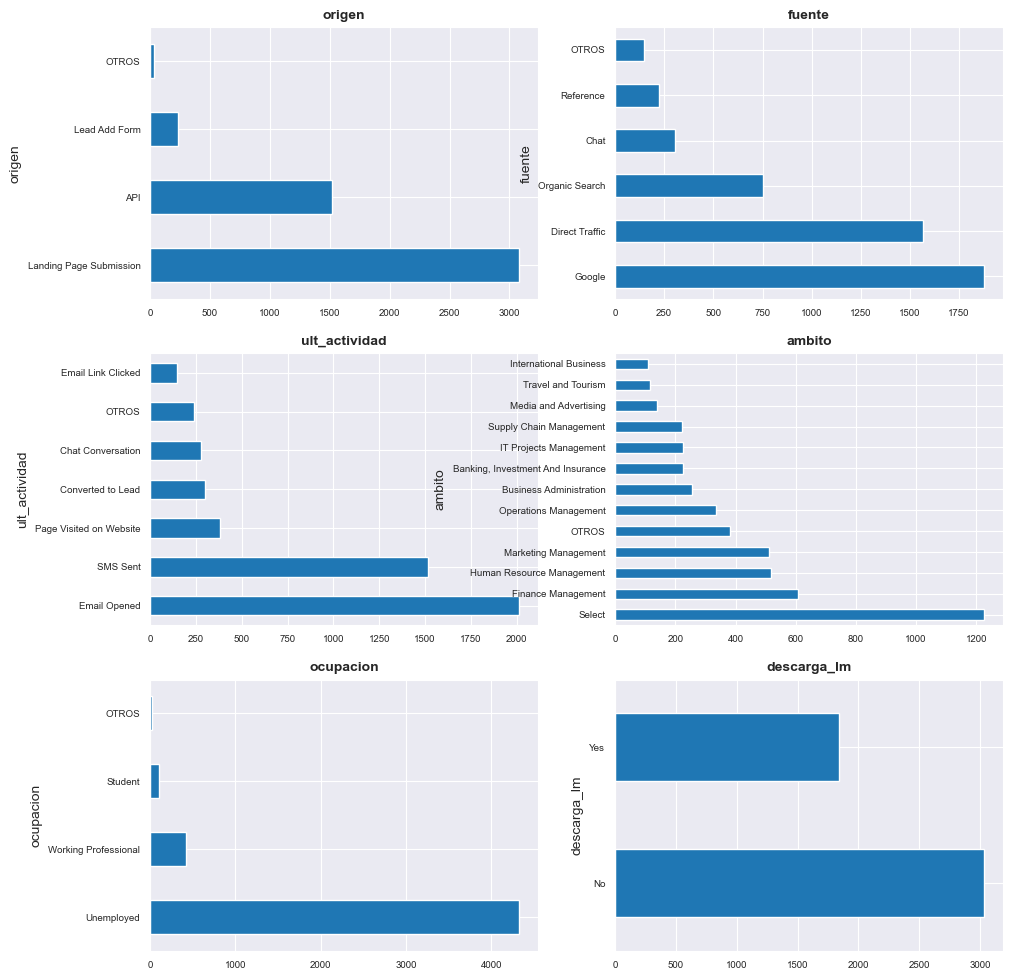

In [12]:
graficos_eda_categoricos(cat)

### Algunos insights

In [13]:
cat2 = cat.copy()
cat2 = pd.concat([cat2,num.compra], axis = 1)
cat2

,origen,fuente,ult_actividad,ambito,ocupacion,descarga_lm,compra
id,,,,,,,
660737,API,Chat,Page Visited on Website,Select,Unemployed,No,0
660728,API,Organic Search,Email Opened,Select,Unemployed,No,0
660727,Landing Page Submission,Direct Traffic,Email Opened,Business Administration,Student,Yes,1
660719,Landing Page Submission,Direct Traffic,OTROS,Media and Advertising,Unemployed,No,0
660673,Landing Page Submission,Google,Email Opened,Supply Chain Management,Unemployed,No,1
...,...,...,...,...,...,...,...
579697,Landing Page Submission,Google,Email Opened,"Banking, Investment And Insurance",Unemployed,No,1
579642,Landing Page Submission,Direct Traffic,SMS Sent,Human Resource Management,Unemployed,Yes,0
579615,Landing Page Submission,Direct Traffic,SMS Sent,Business Administration,Unemployed,No,1


In [14]:
cat2_ocupacion_cr = pd.DataFrame(cat2[['compra']].groupby(cat2.ocupacion).value_counts()).unstack()
cat2_ocupacion_cr.columns = cat2_ocupacion_cr.columns.droplevel(0)
cat2_ocupacion_cr.reset_index(inplace = True)

In [15]:
cat2_ocupacion_cr = cat2_ocupacion_cr.rename(columns = {0:'compra_0',1:'compra_1'})
cat2_ocupacion_cr['total'] = cat2_ocupacion_cr.compra_0 + cat2_ocupacion_cr.compra_1
cat2_ocupacion_cr['conversion_rate'] = cat2_ocupacion_cr.compra_1 / cat2_ocupacion_cr.total * 100
cat2_ocupacion_cr = cat2_ocupacion_cr.reindex([2,1,3,0])
cat2_ocupacion_cr

compra,ocupacion,compra_0,compra_1,total,conversion_rate
2,Unemployed,2748,1581,4329,36.521137
1,Student,55,45,100,45.000000
3,Working Professional,39,382,421,90.736342
0,OTROS,6,17,23,73.913043


In [16]:
cat2_fuente_cr = pd.DataFrame(cat2[['compra']].groupby(cat2.fuente).value_counts()).unstack()
cat2_fuente_cr.columns = cat2_fuente_cr.columns.droplevel(0)
cat2_fuente_cr.reset_index(inplace = True)

In [17]:
cat2_fuente_cr = cat2_fuente_cr.rename(columns = {0:'compra_0',1:'compra_1'})
cat2_fuente_cr['total'] = cat2_fuente_cr.compra_0 + cat2_fuente_cr.compra_1
cat2_fuente_cr['conversion_rate'] = cat2_fuente_cr.compra_1 / cat2_fuente_cr.total * 100
cat2_fuente_cr = cat2_fuente_cr.reindex([0,4,1,2,3,5])
cat2_fuente_cr

compra,fuente,compra_0,compra_1,total,conversion_rate
0,Chat,168,139,307,45.276873
4,Organic Search,449,303,752,40.292553
1,Direct Traffic,1008,559,1567,35.673261
2,Google,1096,782,1878,41.640043
3,OTROS,103,44,147,29.931973
5,Reference,24,198,222,89.189189


In [18]:
cat2_actividad_cr = pd.DataFrame(cat2[['compra']].groupby(cat2.ult_actividad).value_counts()).unstack()
cat2_actividad_cr.columns = cat2_actividad_cr.columns.droplevel(0)
cat2_actividad_cr.reset_index(inplace = True)

In [22]:
cat2_actividad_cr = cat2_actividad_cr.rename(columns = {0:'compra_0',1:'compra_1'})
cat2_actividad_cr['total'] = cat2_actividad_cr.compra_0 + cat2_actividad_cr.compra_1
cat2_actividad_cr['conversion_rate'] = cat2_actividad_cr.compra_1 / cat2_actividad_cr.total * 100
cat2_actividad_cr = cat2_actividad_cr.reindex([5,3,4,0,2,1,6])
cat2_actividad_cr

compra,ult_actividad,compra_0,compra_1,total,conversion_rate
5,Page Visited on Website,276,105,381,27.559055
3,Email Opened,1286,728,2014,36.146971
4,OTROS,121,116,237,48.945148
0,Chat Conversation,216,60,276,21.739130
2,Email Link Clicked,98,49,147,33.333333
1,Converted to Lead,257,45,302,14.900662
6,SMS Sent,594,922,1516,60.817942


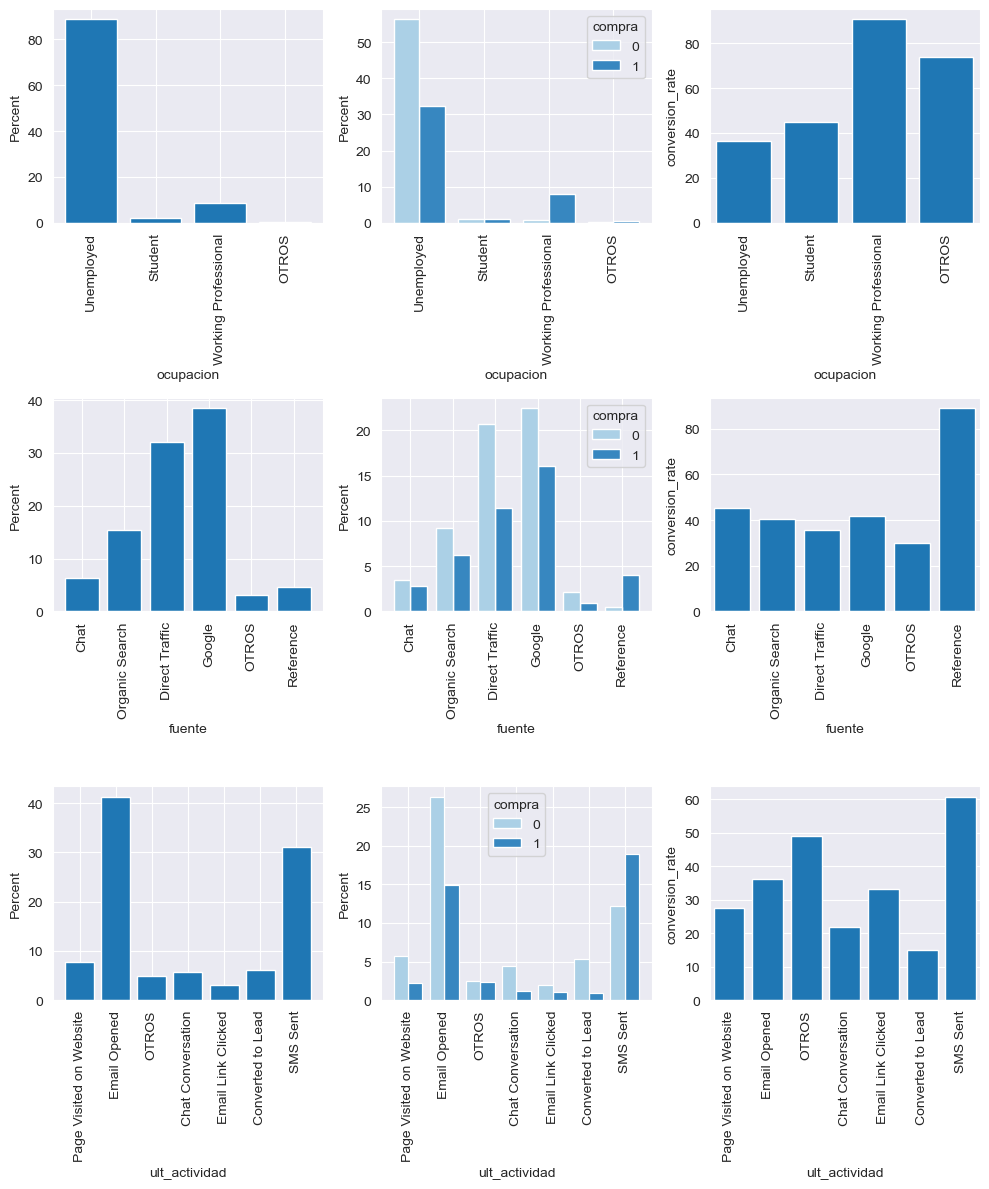

In [25]:
f, ax = plt.subplots(3,3,figsize = (10,12), dpi = 100)
fig1 = sns.histplot(ax=ax[0,0], data = cat2, x = 'ocupacion', stat='percent', alpha = 1, shrink=0.8);
fig2 = sns.histplot(ax=ax[0,1], data = cat2, x = 'ocupacion', stat='percent', hue = 'compra', multiple='dodge', alpha = 1, shrink=0.8, palette='Blues');
fig3 = sns.barplot(ax=ax[0,2], data = cat2_ocupacion_cr, x = 'ocupacion', y = 'conversion_rate', saturation = 1, alpha = 1, width = 0.8);
fig1.set_xticklabels(fig1.get_xticklabels(), rotation=90);
fig2.set_xticklabels(fig2.get_xticklabels(), rotation=90);
fig3.set_xticklabels(fig1.get_xticklabels(), rotation=90);

fig4 = sns.histplot(ax=ax[1,0], data = cat2, x = 'fuente', stat='percent', alpha = 1, shrink=0.8);
fig5 = sns.histplot(ax=ax[1,1], data = cat2, x = 'fuente', stat='percent', hue = 'compra', multiple='dodge', alpha = 1, shrink=0.8, palette='Blues');
fig6 = sns.barplot(ax=ax[1,2], data = cat2_fuente_cr, x = 'fuente', y = 'conversion_rate', saturation = 1, alpha = 1, width = 0.8);
fig4.set_xticklabels(fig4.get_xticklabels(), rotation=90);
fig5.set_xticklabels(fig5.get_xticklabels(), rotation=90);
fig6.set_xticklabels(fig6.get_xticklabels(), rotation=90);

fig7 = sns.histplot(ax=ax[2,0], data = cat2, x = 'ult_actividad', stat='percent', alpha = 1, shrink=0.8);
fig8 = sns.histplot(ax=ax[2,1], data = cat2, x = 'ult_actividad', stat='percent', hue = 'compra', multiple='dodge', alpha = 1, shrink=0.8, palette='Blues');
fig9 = sns.barplot(ax=ax[2,2], data = cat2_actividad_cr, x = 'ult_actividad', y = 'conversion_rate', saturation = 1, alpha = 1, width = 0.8);
fig7.set_xticklabels(fig7.get_xticklabels(), rotation=90);
fig8.set_xticklabels(fig8.get_xticklabels(), rotation=90);
fig9.set_xticklabels(fig9.get_xticklabels(), rotation=90);

f.tight_layout()
fig = fig9.get_figure()
fig.savefig("exhibit_1.png")

## EDA NUMÉRICAS

### Análisis estadístico

In [26]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [27]:
estadisticos_cont(num)

,count,mean,median,std,min,25%,50%,75%,max
compra,4873.0,0.415555,0.0,0.492868,0.0,0.0,0.0,1.0,1.0
visitas_total,4873.0,4.129079,3.0,3.465577,0.0,2.0,3.0,5.0,50.0
tiempo_en_site_total,4873.0,603.275805,365.0,553.562737,0.0,130.0,365.0,1081.0,2272.0
paginas_vistas_visita,4873.0,2.883575,2.5,1.927822,0.0,2.0,2.5,4.0,20.0
score_actividad,4873.0,14.052534,14.0,0.951896,7.0,14.0,14.0,14.0,18.0
score_perfil,4873.0,16.298174,16.0,1.427055,11.0,16.0,16.0,17.0,20.0


In [30]:
estadisticos_cont(num[num.compra==1])

,count,mean,median,std,min,25%,50%,75%,max
compra,2025.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
visitas_total,2025.0,4.243457,3.0,3.610274,0.0,2.0,3.0,5.0,50.0
tiempo_en_site_total,2025.0,871.002963,980.0,572.883419,0.0,295.0,980.0,1324.0,2170.0
paginas_vistas_visita,2025.0,2.83039,2.5,2.00623,0.0,2.0,2.5,4.0,20.0
score_actividad,2025.0,14.31358,14.0,0.735155,10.0,14.0,14.0,15.0,17.0
score_perfil,2025.0,16.539753,16.0,1.514595,11.0,16.0,16.0,17.0,20.0


### Análisis gráfico

In [47]:
def graficos_eda_continuas(num):
    
    #Calculamos el número de fila que necesitamos
    from math import ceil
    filas = ceil(num.shape[1] / 3)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 3, figsize = (10, filas * 3), dpi = 100)

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(num):
        num[variable].plot.density(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 10, fontweight = "bold")
        ax[cada].tick_params(labelsize = 9)
    f.tight_layout()

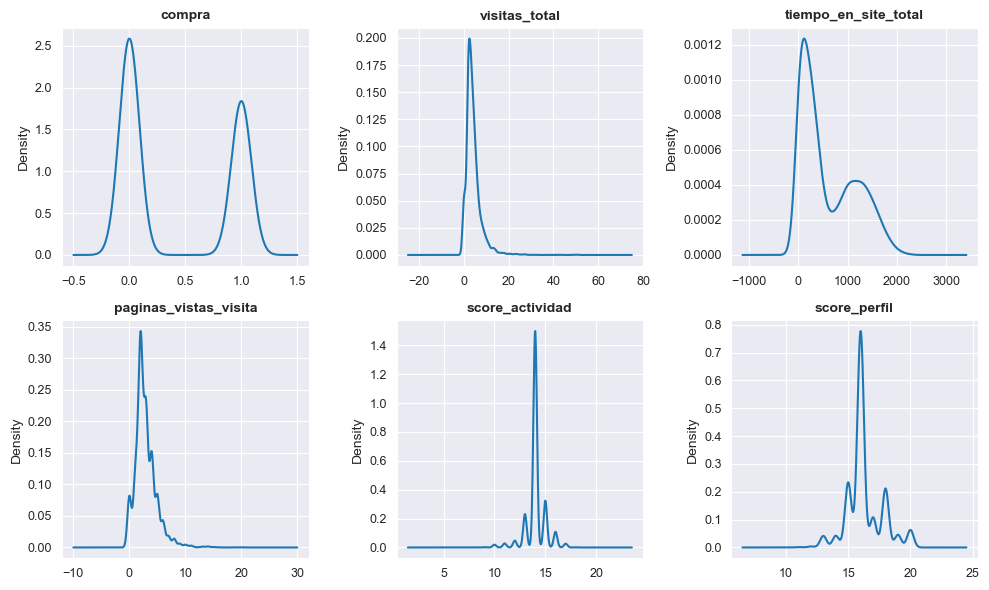

In [50]:
graficos_eda_continuas(num)

## GUARDAR DATASETS TRAS CALIDAD DE DATOS

Guarda los avances en cat y num con un sufijo para poder guardar o recuperar avances del proyecto.

En formato pickle para no perder las modificaciones de metadatos.

*NOTA: En algunos casos no hay cambios en los ficheros en esta fase, así que este paso es opcional.Pero si no guardas estos ficheros acuérdate de modificar la importación en el siguiente notebook.*

In [44]:
#Definir los nombres de los archivos
ruta_cat = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'cat_resultado_eda.pickle'
ruta_num = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'num_resultado_eda.pickle'

In [49]:
cat = cat.reset_index()
num = num.reset_index()

In [50]:
#Guardar los archivos
cat.to_pickle(ruta_cat)
num.to_pickle(ruta_num)